<a href="https://colab.research.google.com/github/Saili-Myana/ML-Learning-Projects/blob/master/COVID_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2

In [0]:

import numpy as np
from tqdm import tqdm

In [0]:
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import os

In [0]:
import random

In [0]:
import gc

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_dir='/content/gdrive/My Drive/Covid project/train_5-5-20-2-45pm'
test_dir='/content/gdrive/My Drive/Covid project/test_5-5-20-2-45pm'
#train_apple=['C:/Users/Saili/Desktop/hale_1\{}'.format(i) for i in os.listdir(train_dir) if 'apple' in i]
train_covid=os.path.join(train_dir,'covid')
test_covid=os.path.join(test_dir,'covid')
#print(tqdm(os.listdir(train_apple)))
#train_orange=['C:/Users/Saili/Desktop/hale_1\{}'.format(i) for i in os.listdir(train_dir) if 'orange' in i]
train_normal=os.path.join(train_dir,'normal')
test_normal=os.path.join(test_dir,'normal')

In [12]:
len(os.listdir(train_covid))


624

In [13]:
train_imgs=[]
labels=['covid','normal']
a=0
for l in labels:
  new_path=os.path.join(train_dir,l)
  num_label=labels.index(l)
  list=os.listdir(new_path)
  for img in list:
    img=cv2.imread(os.path.join(new_path,img),cv2.IMREAD_COLOR)
    img=cv2.resize(img,(300,300),interpolation = cv2.INTER_CUBIC)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    train_imgs.append([img,num_label])
    a+=1
    print(a)
    #imgplot=plt.imshow(RGB_img)
    
    #plt.show()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [0]:
random.shuffle(train_imgs)

In [15]:
np.array(train_imgs).shape

(1248, 2)

In [0]:
train_imgs=np.array(train_imgs)
y=train_imgs[:,1]
X=train_imgs[:,0]

In [17]:
X.shape

(1248,)

###VISUALIZING DATA: 0 is for covid and 1 is for Normal

1
1
1
0
1


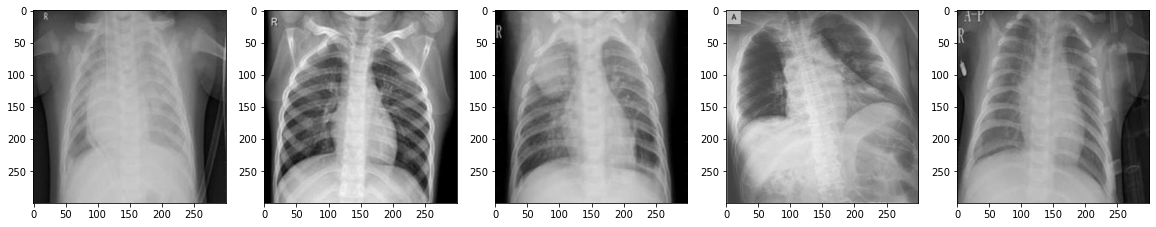

In [18]:
plt.figure(figsize=(20,10))
columns=5
for i in range(columns):
    plt.subplot(5/columns +1,columns,i+1)
    RGB_img = cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB)
    imgplot=plt.imshow(RGB_img)
    #plt.imshow(X[i])
    print(y[i])

In [19]:
del train_imgs
gc.collect()

30

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Covid and normal')

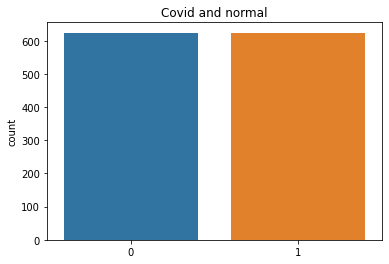

In [20]:
import seaborn as sns
X=np.array(X)
y=np.array(y)
sns.countplot(y)
plt.title('Covid and normal')

In [21]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(1248,)
(1248,)


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=2)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(998,)
(250,)
(998,)
(250,)


In [23]:
del X
del y
gc.collect()

0

In [0]:
ntrain=len(X_train)
nval=len(X_val)
batch_size=32 #4,8,16,32

In [0]:
X_train1=[]
X_val1=[]
y_train1=[]
y_val1=[]
for i in range(len(X_train)):
  X_train1.append(X_train[i])
for i in range(len(X_val)):
  X_val1.append(X_val[i])
for i in range(len(y_train)):
  y_train1.append(y_train[i])
for i in range(len(y_val)):
  y_val1.append(y_val[i])

In [26]:
np.array(X_val1).shape

(250, 300, 300, 3)

In [27]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [0]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 128)      

In [0]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [0]:
train_datagen=ImageDataGenerator()

val_datagen=ImageDataGenerator()

In [32]:
X_train1=np.array(X_train1)
y_train1=np.array(y_train1)
X_val1=np.array(X_val1)
y_val1=np.array(y_val1)
print(X_train1.shape)
print(y_train1.shape)
print(X_val1.shape)
print(y_val1.shape)

(998, 300, 300, 3)
(998,)
(250, 300, 300, 3)
(250,)


In [0]:
train_generator=train_datagen.flow(X_train1,y_train1,batch_size=batch_size)
val_generator=val_datagen.flow(X_val1,y_val1,batch_size=batch_size)

In [34]:
history=model.fit(train_generator,
                 steps_per_epoch=ntrain // batch_size,
                 epochs=64,
                 validation_data=val_generator,
                 validation_steps=nval // batch_size)

Epoch 1/64
31/31 [==============================] - 13s 421ms/step - loss: 8.0702 - acc: 0.7795 - val_loss: 0.1702 - val_acc: 0.9464
Epoch 2/64
31/31 [==============================] - 5s 174ms/step - loss: 0.6992 - acc: 0.8944 - val_loss: 0.0758 - val_acc: 0.9725
Epoch 3/64
31/31 [==============================] - 5s 165ms/step - loss: 0.1638 - acc: 0.9493 - val_loss: 0.1009 - val_acc: 0.9725
Epoch 4/64
31/31 [==============================] - 5s 163ms/step - loss: 0.0875 - acc: 0.9689 - val_loss: 0.0522 - val_acc: 0.9633
Epoch 5/64
31/31 [==============================] - 5s 164ms/step - loss: 0.5769 - acc: 0.9431 - val_loss: 0.0587 - val_acc: 0.9817
Epoch 6/64
31/31 [==============================] - 5s 165ms/step - loss: 0.0167 - acc: 0.9938 - val_loss: 0.0074 - val_acc: 0.9725
Epoch 7/64
31/31 [==============================] - 5s 163ms/step - loss: 0.3644 - acc: 0.9576 - val_loss: 0.0020 - val_acc: 0.9862
Epoch 8/64
31/31 [==============================] - 5s 163ms/step - loss: 0

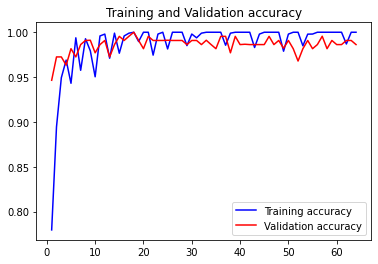

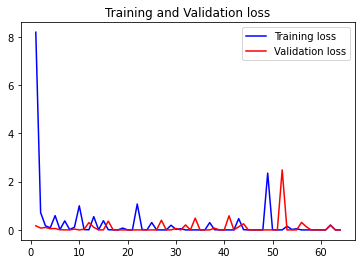

In [35]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### Labeling: Covid is 0 and Normal is 1


In [37]:
test_imgs=[]
labels=['covid','normal']
a=0
for l in labels:
  new_path=os.path.join(test_dir,l)
  num_label=labels.index(l)
  for img in os.listdir(new_path):
    img=cv2.imread(os.path.join(new_path,img),cv2.IMREAD_COLOR)
    img=cv2.resize(img,(300,300),interpolation = cv2.INTER_CUBIC)
    #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_imgs.append([img,num_label])
    #imgplot=plt.imshow(RGB_img)
    print(a)
    a=a+1
    #plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [38]:
np.array(test_imgs).shape

(576, 2)

In [0]:
random.shuffle(test_imgs)

In [0]:
test_imgs=np.array(test_imgs)
y_test=test_imgs[:,1]
X_test=test_imgs[:,0]

In [0]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [0]:
X_test1=[]
for i in range(len(X_test)):
  X_test1.append(X_test[i])

In [43]:
X_test1=np.array(X_test1)
#y_test1=np.array(y_test1)
X_test1.shape

(576, 300, 300, 3)

In [0]:
#X_test,y_test = read_and_process_image(test_image)
#x=np.array(X_test)
test_datagen=ImageDataGenerator(rescale=1./255)

In [0]:
pred=model.predict(X_test1)

In [72]:
len(pred)

576

In [73]:
len(y_test)

576

In [58]:
for i in range(len(y_test)):
    print(f'{pred[i]} {y_test[i]}')

[1.] 1
[0.] 0
[1.9781318e-28] 0
[0.] 0
[2.3352213e-37] 0
[1.] 1
[3.752518e-09] 0
[1.4883343e-26] 0
[2.7900826e-27] 0
[1.] 1
[7.285419e-21] 0
[1.] 1
[0.] 0
[4.788722e-33] 0
[0.] 0
[9.200406e-19] 0
[1.] 1
[1.] 1
[1.] 1
[0.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[2.0901504e-15] 0
[1.] 1
[0.] 0
[4.058643e-37] 0
[1.] 1
[0.] 0
[1.8359207e-11] 0
[0.] 0
[1.] 1
[0.9999633] 1
[1.] 1
[0.] 0
[1.] 1
[1.] 1
[7.917746e-16] 0
[0.] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[6.6384534e-16] 0
[0.] 0
[1.] 1
[0.] 0
[1.] 1
[0.22985445] 0
[1.] 1
[1.] 1
[3.4602948e-08] 0
[4.395488e-09] 0
[1.] 1
[3.7056273e-15] 0
[7.396441e-16] 0
[0.] 0
[1.] 1
[4.2499375e-13] 0
[1.] 1
[1.] 1
[0.] 0
[1.5357216e-16] 0
[1.] 1
[4.460899e-29] 0
[1.] 1
[1.] 1
[0.] 0
[1.] 1
[1.] 1
[1.] 1
[1.7318127e-28] 0
[1.] 1
[1.4524082e-10] 0
[1.] 1
[1.] 1
[1.] 1
[2.20312e-16] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[0.] 0
[1.4792157e-11] 0
[1.] 1
[3.9570515e-16] 0
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[1.] 1
[0.] 0
[1.] 1
[1.2052109e-27] 0
[1.1028114e-14] 0
[1.] 1
[1.] 1
[1.] 1

In [0]:
#i=0
correct=0
wrong=0
n=0
for iter in range(len(y_test)):
    
  
    if pred[iter]>0.5:
        if y_test[iter]==1:
            correct+=1
        else:
            wrong+=1
    else:
        if y_test[iter]==0:
            correct+=1
        else:
            wrong+=1
        
  
    

In [60]:
print(correct)
print(wrong)

571
5


###ACCURACY:

In [61]:
correct/(correct+wrong)

0.9913194444444444

In [0]:
from random import randint

<function matplotlib.pyplot.show>

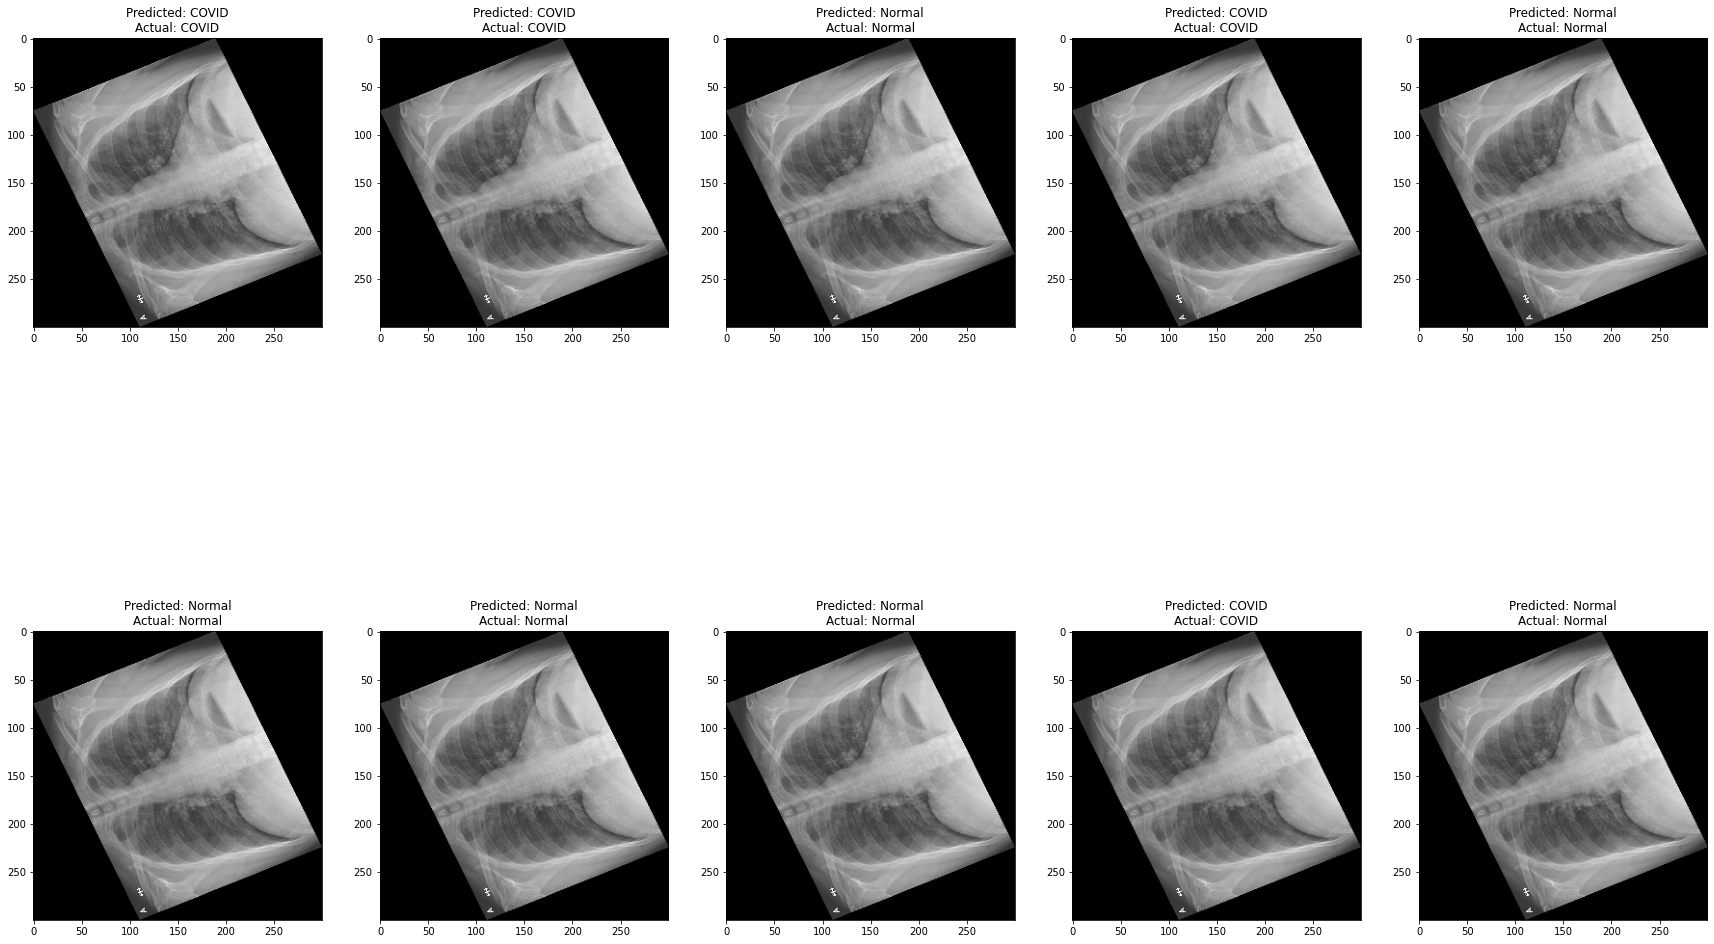

In [76]:
plt.figure(figsize=(30,20))
for n in range(10):
    x=randint(0,len(y_test)-1)
    if pred[x] >0.5:
        text_labels='Normal'
    else:
        text_labels='COVID'
    plt.subplot(5/columns+1,columns,n+1)
    if  y_test[x]==1:
        plt.title('Predicted: '+ text_labels+'\nActual: Normal')
    else:
        plt.title('Predicted: '+ text_labels+'\nActual: COVID')

    RGB_img = cv2.cvtColor(batch[0], cv2.COLOR_BGR2RGB)
    imgplot=plt.imshow(RGB_img)
    #imgplot=plt.imshow(batch[0])

plt.show